# Data Science: Time Series Analysis [Revision]

https://cursos.alura.com.br/course/data-science-series-temporais

## Sales trend


### Upload a csv file with Alucar sales for 2017 and 2018 

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')
alucar.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar.columns = ['month', 'sales']
alucar.head(5)

,month,sales
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


### Examine the file through pandas functions to find out the number of rows and columns present with the alucar.shape command

In [4]:
print(f'Rows: {alucar.shape[0]}')
print(f'Columns: {alucar.shape[1]}')

Rows: 24
Columns: 2


### Check for null data with the command alucar.isna().sum()

In [5]:
print(f'Null data: {alucar.isna().sum().sum()}')

Null data: 0


### Change the month type from object to datetime with the command alucar['month'] = pd.to_datetime(alucar['month'])

In [6]:
alucar['month'] = pd.to_datetime(alucar['month'])

In [7]:
alucar.dtypes

month    datetime64[ns]
sales             int64
dtype: object

### Import the necessary libraries to generate a sales chart

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
print(sns.__version__)

0.11.2


### Perfect the chart by including a new color palette, including appropriately sized title and labels better describing what the chart is about

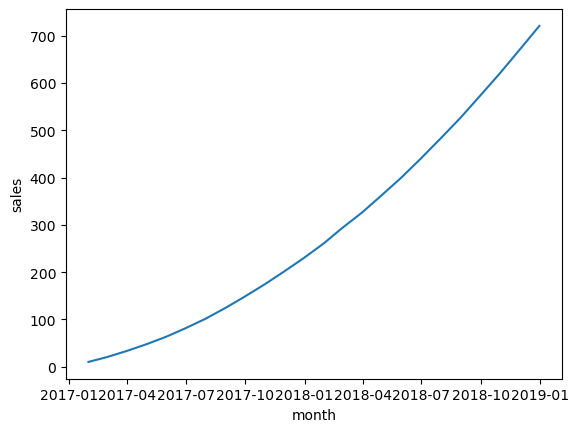

In [10]:
sns.lineplot(x = 'month', y = 'sales', data = alucar)
sns = sns

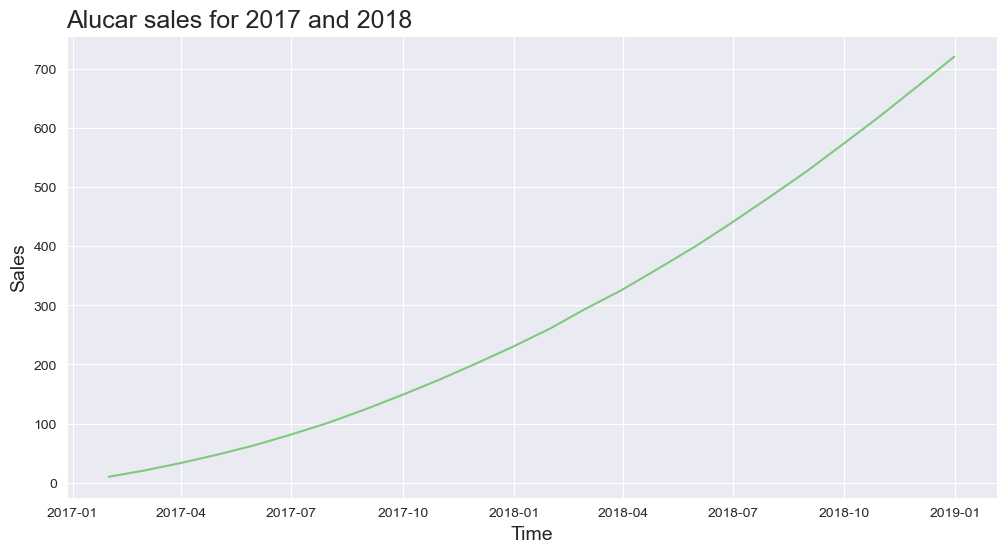

In [19]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'month', y = 'sales', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Alucar sales for 2017 and 2018', loc='left', fontsize = 18)
ax.set_xlabel('Time', fontsize = 14)
ax.set_ylabel('Sales', fontsize = 14)
ax = ax

## Decomposition and autocorrelation

### Create a function called to_plot() and plot_comparison() to generate standardized plots, avoiding duplicate code

In [25]:
def to_plot(title, labelx, labely, x, y, data):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

### Apply the Decomposition technique of a time series to measure month-to-month growth and use the diff() function to decompose the sales to create the increase, and the increase to find the acceleration

In [21]:
alucar['increase'] = alucar['sales'].diff()

In [22]:
alucar['acceleration'] = alucar['increase'].diff()

In [24]:
alucar.head(7)

,month,sales,increase,acceleration
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0


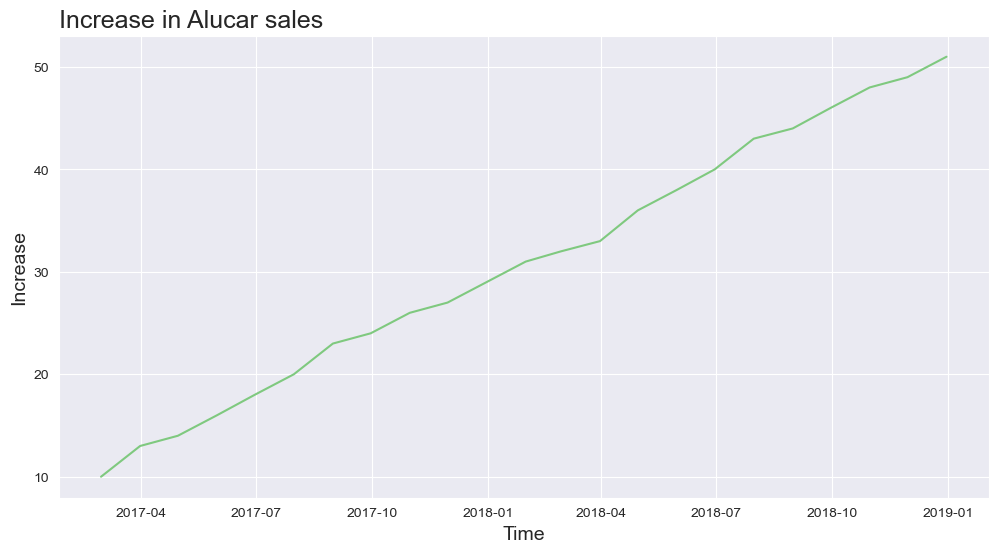

In [27]:
to_plot('Increase in Alucar sales', 'Time', 'Increase', 'month', 'increase', alucar)

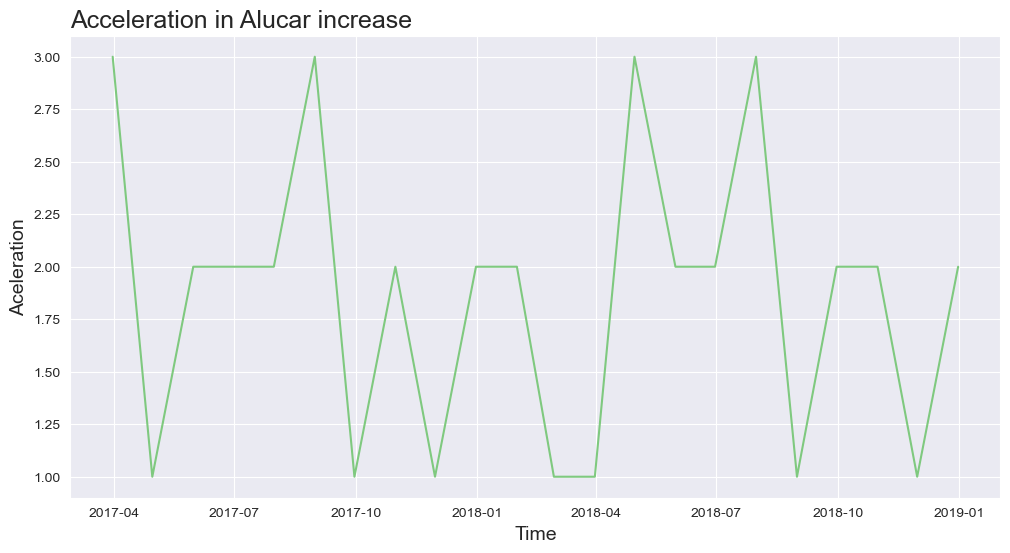

In [30]:
to_plot('Acceleration in Alucar increase', 'Time', 'Aceleration', 'month', 'acceleration', alucar)

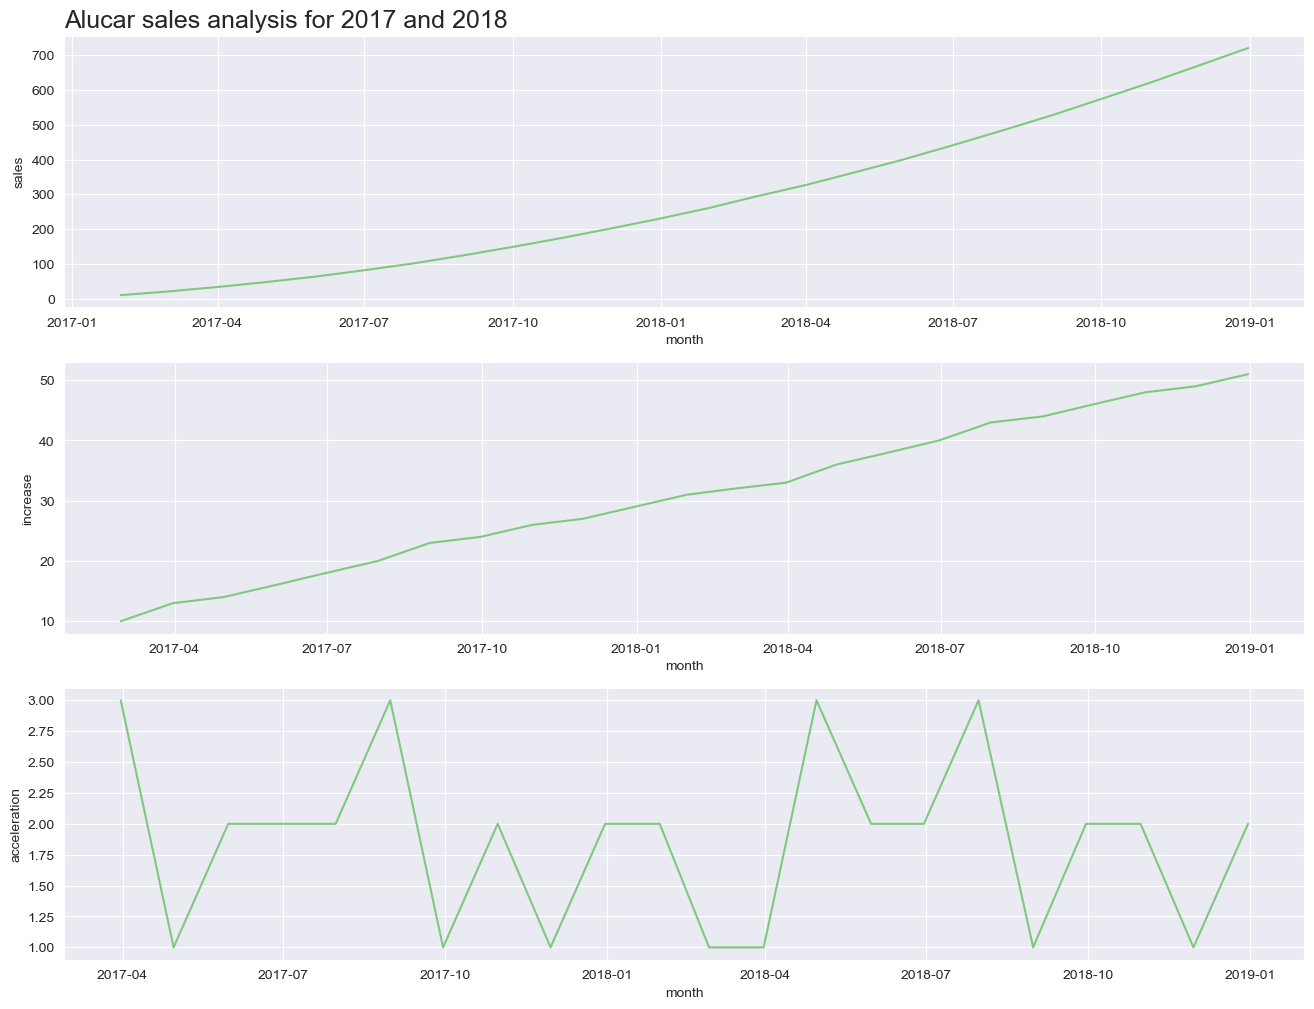

In [37]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Alucar sales analysis for 2017 and 2018',fontsize=18, loc='left')
sns.lineplot(x='month', y='sales', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='month', y='increase', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='month', y='acceleration', data=alucar)
ax=ax

### Run the Autocorrelation function to find out the correlation level of sales, lift and acceleration

In [38]:
from pandas.plotting import autocorrelation_plot

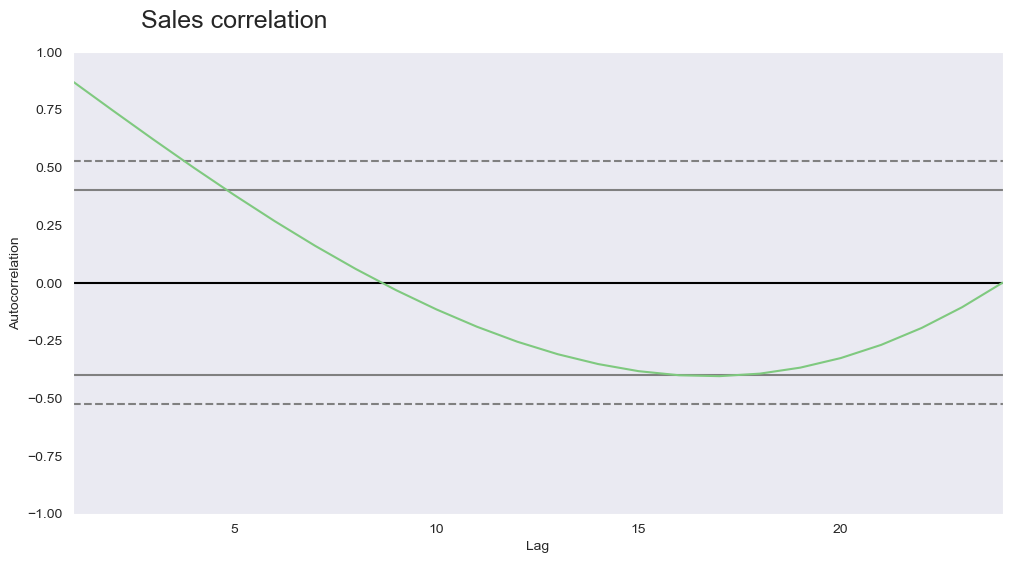

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Sales correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['sales'])
ax = ax

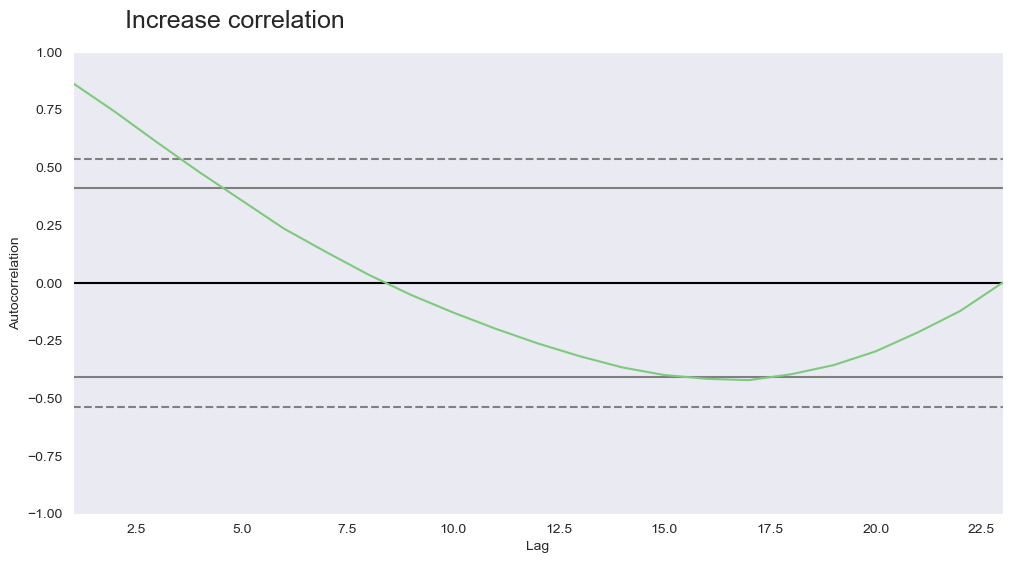

In [52]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Increase correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['increase'][1:])
ax = ax

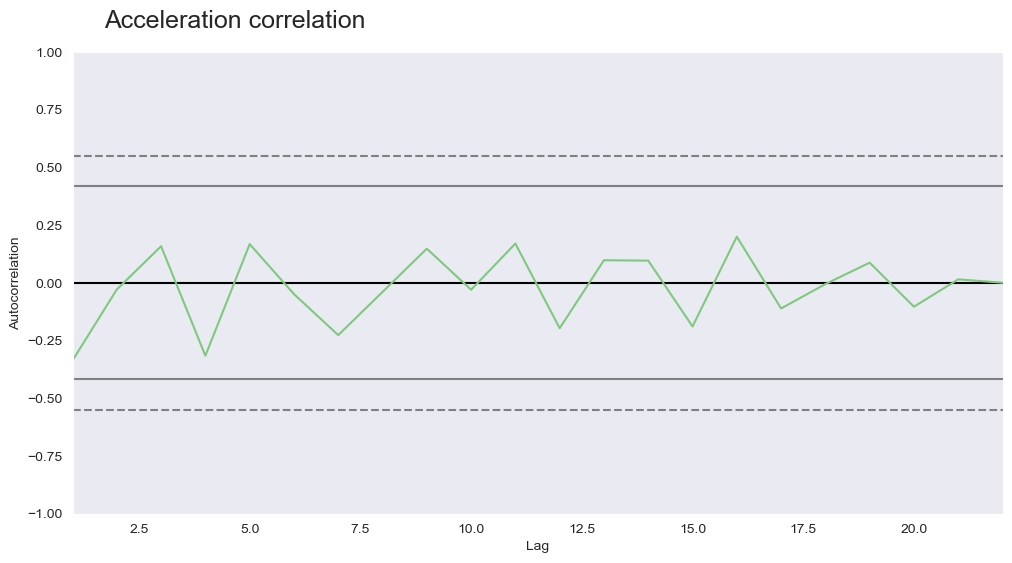

In [53]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Acceleration correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['acceleration'][2:])
ax = ax